In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from new_helpers import *
from original_helpers import *
from features import *

# Building the model data

In [2]:
X, Y = build_model_data(extract_features_edge)
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
print(X.shape)

X [(6250, 7)] and Y [(6250,)]
(6250, 120)


# LogisticRegression

In [3]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [4]:
# Predict on the training set
Z = logreg.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

True positive rate = 0.20512
F1-score: 0.575403949731
            t/p           road             bg
           road           3076           1346
             bg            546           1282
Confusion matrix: None


# KNeighborsClassifier

X, Y = build_model_data(extract_features_edge) with feature.canny(color.rgb2gray(img), sigma=5, high_threshold=0.15, low_threshold=0
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

--> 0.612627271802

In [5]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
# Predict on the training set
Z = neigh.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

True positive rate = 0.20288
F1-score: 0.73231302339
            t/p           road             bg
           road           4055            367
             bg            560           1268
Confusion matrix: None


# Cross-validation

In [7]:
from sklearn.model_selection import cross_val_score
cr_val = cross_val_score(neigh, X, Y, cv=10, scoring='f1')
print(cr_val)
print(cr_val.mean())

[ 0.65        0.66153846  0.70165746  0.57458564  0.51744186  0.57060519
  0.61176471  0.61861862  0.6         0.62006079]
0.612627271802


# Display prediction

F1-score: 0.498498498498
            t/p             bg           road
             bg            375             51
           road            116             83
Confusion matrix: None


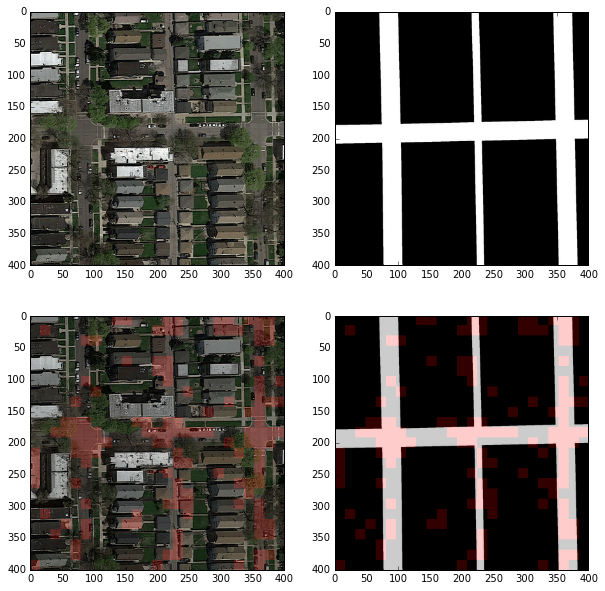

In [8]:
img_idx = 69
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(3)
Xi = poly.fit_transform(Xi)
Zi = neigh.predict(Xi)

display_prediction_alt(img, gt, 16, Zi)
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))

F1-score: 0.548571428571


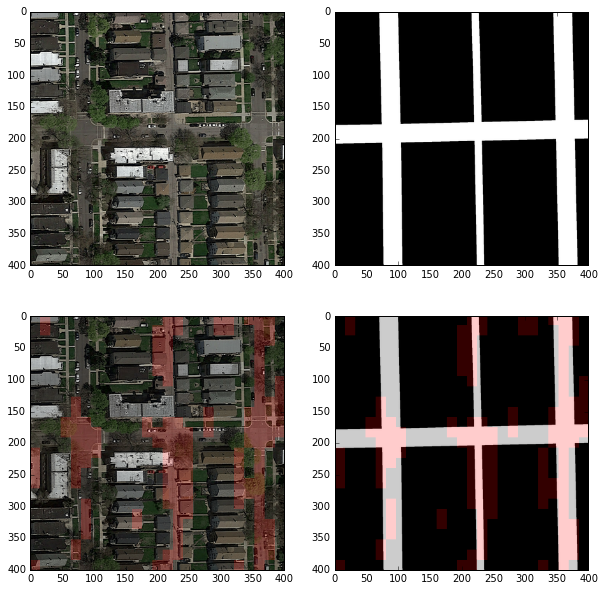

In [9]:
from skimage.morphology import *
Zi_c = binary_closing(Zi)
Zi_c = remove_small_objects(label(Zi_c), min_size=2, connectivity=3)
Zi_c[Zi_c >= 1] = 1
display_prediction_alt(img, gt, 16, Zi_c)
print('F1-score:', f1_score(Yi,Zi_c))

In [10]:
from skimage.feature import canny
from skimage import color
edge = canny(color.rgb2gray(img), sigma=5, high_threshold=0.15, low_threshold=0)

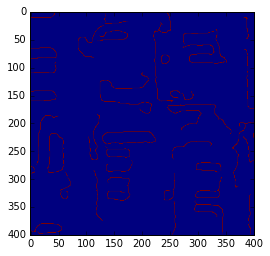

In [11]:
plt.imshow(edge)

# SVM

In [12]:
from sklearn import svm
svc = svm.LinearSVC(C=4.0, class_weight={1: 3})
svc.fit(X,Y)

LinearSVC(C=4.0, class_weight={1: 3}, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
from sklearn.model_selection import cross_val_score
cr_val = cross_val_score(svc, X, Y, cv=10, scoring='f1')
print(cr_val)
print(cr_val.mean())

[ 0.55367232  0.59363958  0.63136456  0.58823529  0.50894632  0.50733753
  0.54976303  0.57142857  0.52837573  0.56155508]
0.559431801092


F1-score: 0.610169491525
            t/p             bg           road
             bg            338             85
           road             76            126
Confusion matrix: None


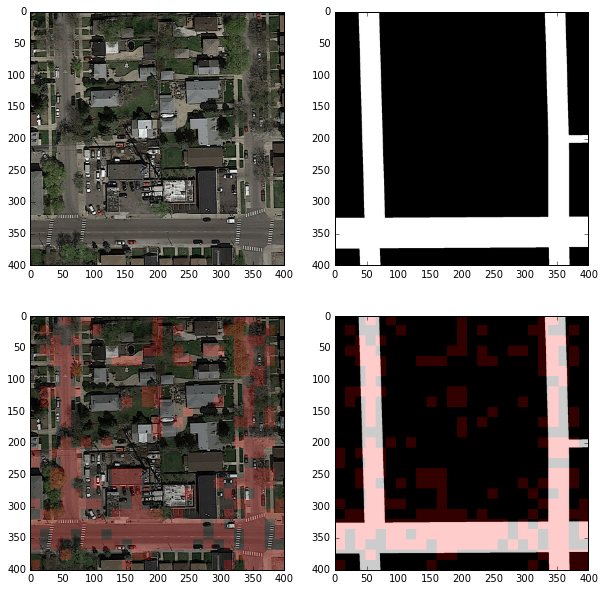

In [14]:
img_idx = 93
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(3)
Xi = poly.fit_transform(Xi)
Zi = neigh.predict(Xi)

display_prediction_alt(img, gt, 16, Zi)
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))

# MLPClassifier

 - Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.
 
- from sklearn.preprocessing import StandardScaler  
    scaler = StandardScaler()  
    #Don't cheat - fit only on training data
    
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    apply same transformation to test data
    X_test = scaler.transform(X_test)  
    
- Finding a reasonable regularization parameter \alpha is best done using GridSearchCV, usually in the range '''10.0 \*\* -np.arange(1, 7)'''
- Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

In [15]:
from sklearn.neural_network import MLPClassifier

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X_train = scaler.transform(X)

In [21]:
clf = MLPClassifier(random_state=1, max_iter=1000, solver='lbfgs', activation='logistic')
clf.fit(X_train, Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [26]:
clf.score(X_train,Y)

0.87136000000000002

Mean accuracy score: 0.736
F1-score: 0.594594594595
            t/p             bg           road
             bg            339             42
           road            123            121
Confusion matrix: None


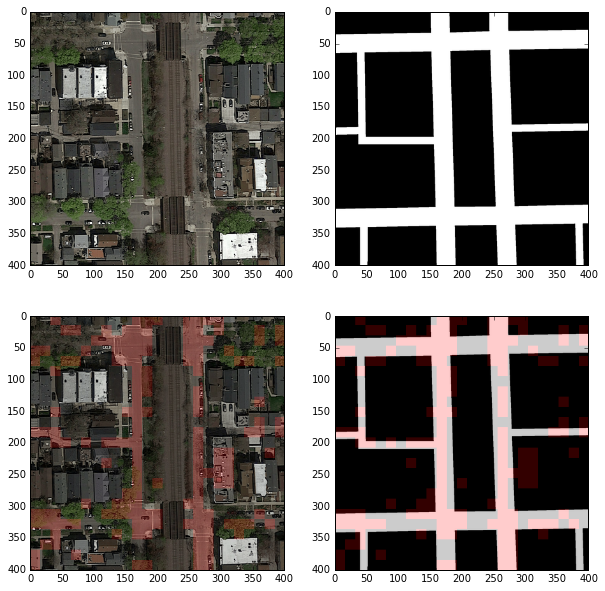

In [25]:
img_idx = 81
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(3)
Xi = poly.fit_transform(Xi)
Xi = scaler.transform(Xi)  
Zi = clf.predict(Xi)
print('Mean accuracy score:', clf.score(Xi,Yi))
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))
display_prediction_alt(img, gt, 16, Zi)

F1-score: 0.312757201646


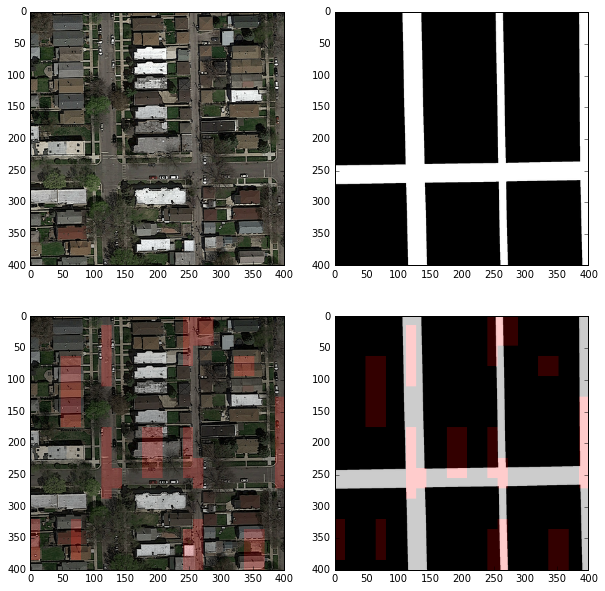

In [19]:
from skimage.morphology import *
Zi_c = binary_closing(Zi)
Zi_c = remove_small_objects(label(Zi_c), min_size=2, connectivity=3)
Zi_c[Zi_c >= 1] = 1
display_prediction_alt(img, gt, 16, Zi_c)
print('F1-score:', f1_score(Yi,Zi_c))